In [1]:
import numpy as np
from IPython.display import display
import subprocess
import matplotlib.pyplot as plt

# entradas = [10e0,10e1,10e2,10e3,10e4,10e5,10e6]
entradas = [x for x in range(int(10e0),int(10e6),int(10e3))]

subprocess.run("gcc busca_sequencial.c -o busca_sequencial",shell=True)
subprocess.run("gcc busca_binaria.c -o busca_binaria",shell=True)

tempos_busca_bin = []
tempos_busca_seq = []
    
for entrada in entradas:
    
    subprocess.run("echo "+str(entrada)+" > entrada",shell=True)
    resultado_busca_bin = subprocess.run("./busca_binaria < entrada",shell=True,stdout=subprocess.PIPE, text=True)
    resultado_busca_sequencial = subprocess.run("./busca_sequencial < entrada",shell=True,stdout=subprocess.PIPE, text=True)
    
    print("busca binaria p/ entrada tam "+str(entrada)+ ": "+ str(resultado_busca_bin.stdout))
    print("busca sequencial p/ entrada tam "+str(entrada)+ ": "+ str(resultado_busca_sequencial.stdout))
    

    tempos_busca_bin.append(resultado_busca_bin.stdout)
    tempos_busca_seq.append(resultado_busca_sequencial.stdout)


tempos_busca_bin = np.asarray(tempos_busca_bin,dtype=float)
tempos_busca_seq = np.asarray(tempos_busca_seq,dtype=float)


busca binaria p/ entrada tam 10: 0.000009
busca sequencial p/ entrada tam 10: 0.000003
busca binaria p/ entrada tam 10010: 0.000003
busca sequencial p/ entrada tam 10010: 0.000048
busca binaria p/ entrada tam 20010: 0.000003
busca sequencial p/ entrada tam 20010: 0.000092
busca binaria p/ entrada tam 30010: 0.000004
busca sequencial p/ entrada tam 30010: 0.000146
busca binaria p/ entrada tam 40010: 0.000003
busca sequencial p/ entrada tam 40010: 0.000182
busca binaria p/ entrada tam 50010: 0.000004
busca sequencial p/ entrada tam 50010: 0.000214
busca binaria p/ entrada tam 60010: 0.000003
busca sequencial p/ entrada tam 60010: 0.000218
busca binaria p/ entrada tam 70010: 0.000003
busca sequencial p/ entrada tam 70010: 0.000299
busca binaria p/ entrada tam 80010: 0.000003
busca sequencial p/ entrada tam 80010: 0.000375
busca binaria p/ entrada tam 90010: 0.000003
busca sequencial p/ entrada tam 90010: 0.000408
busca binaria p/ entrada tam 100010: 0.000002
busca sequencial p/ entrada ta

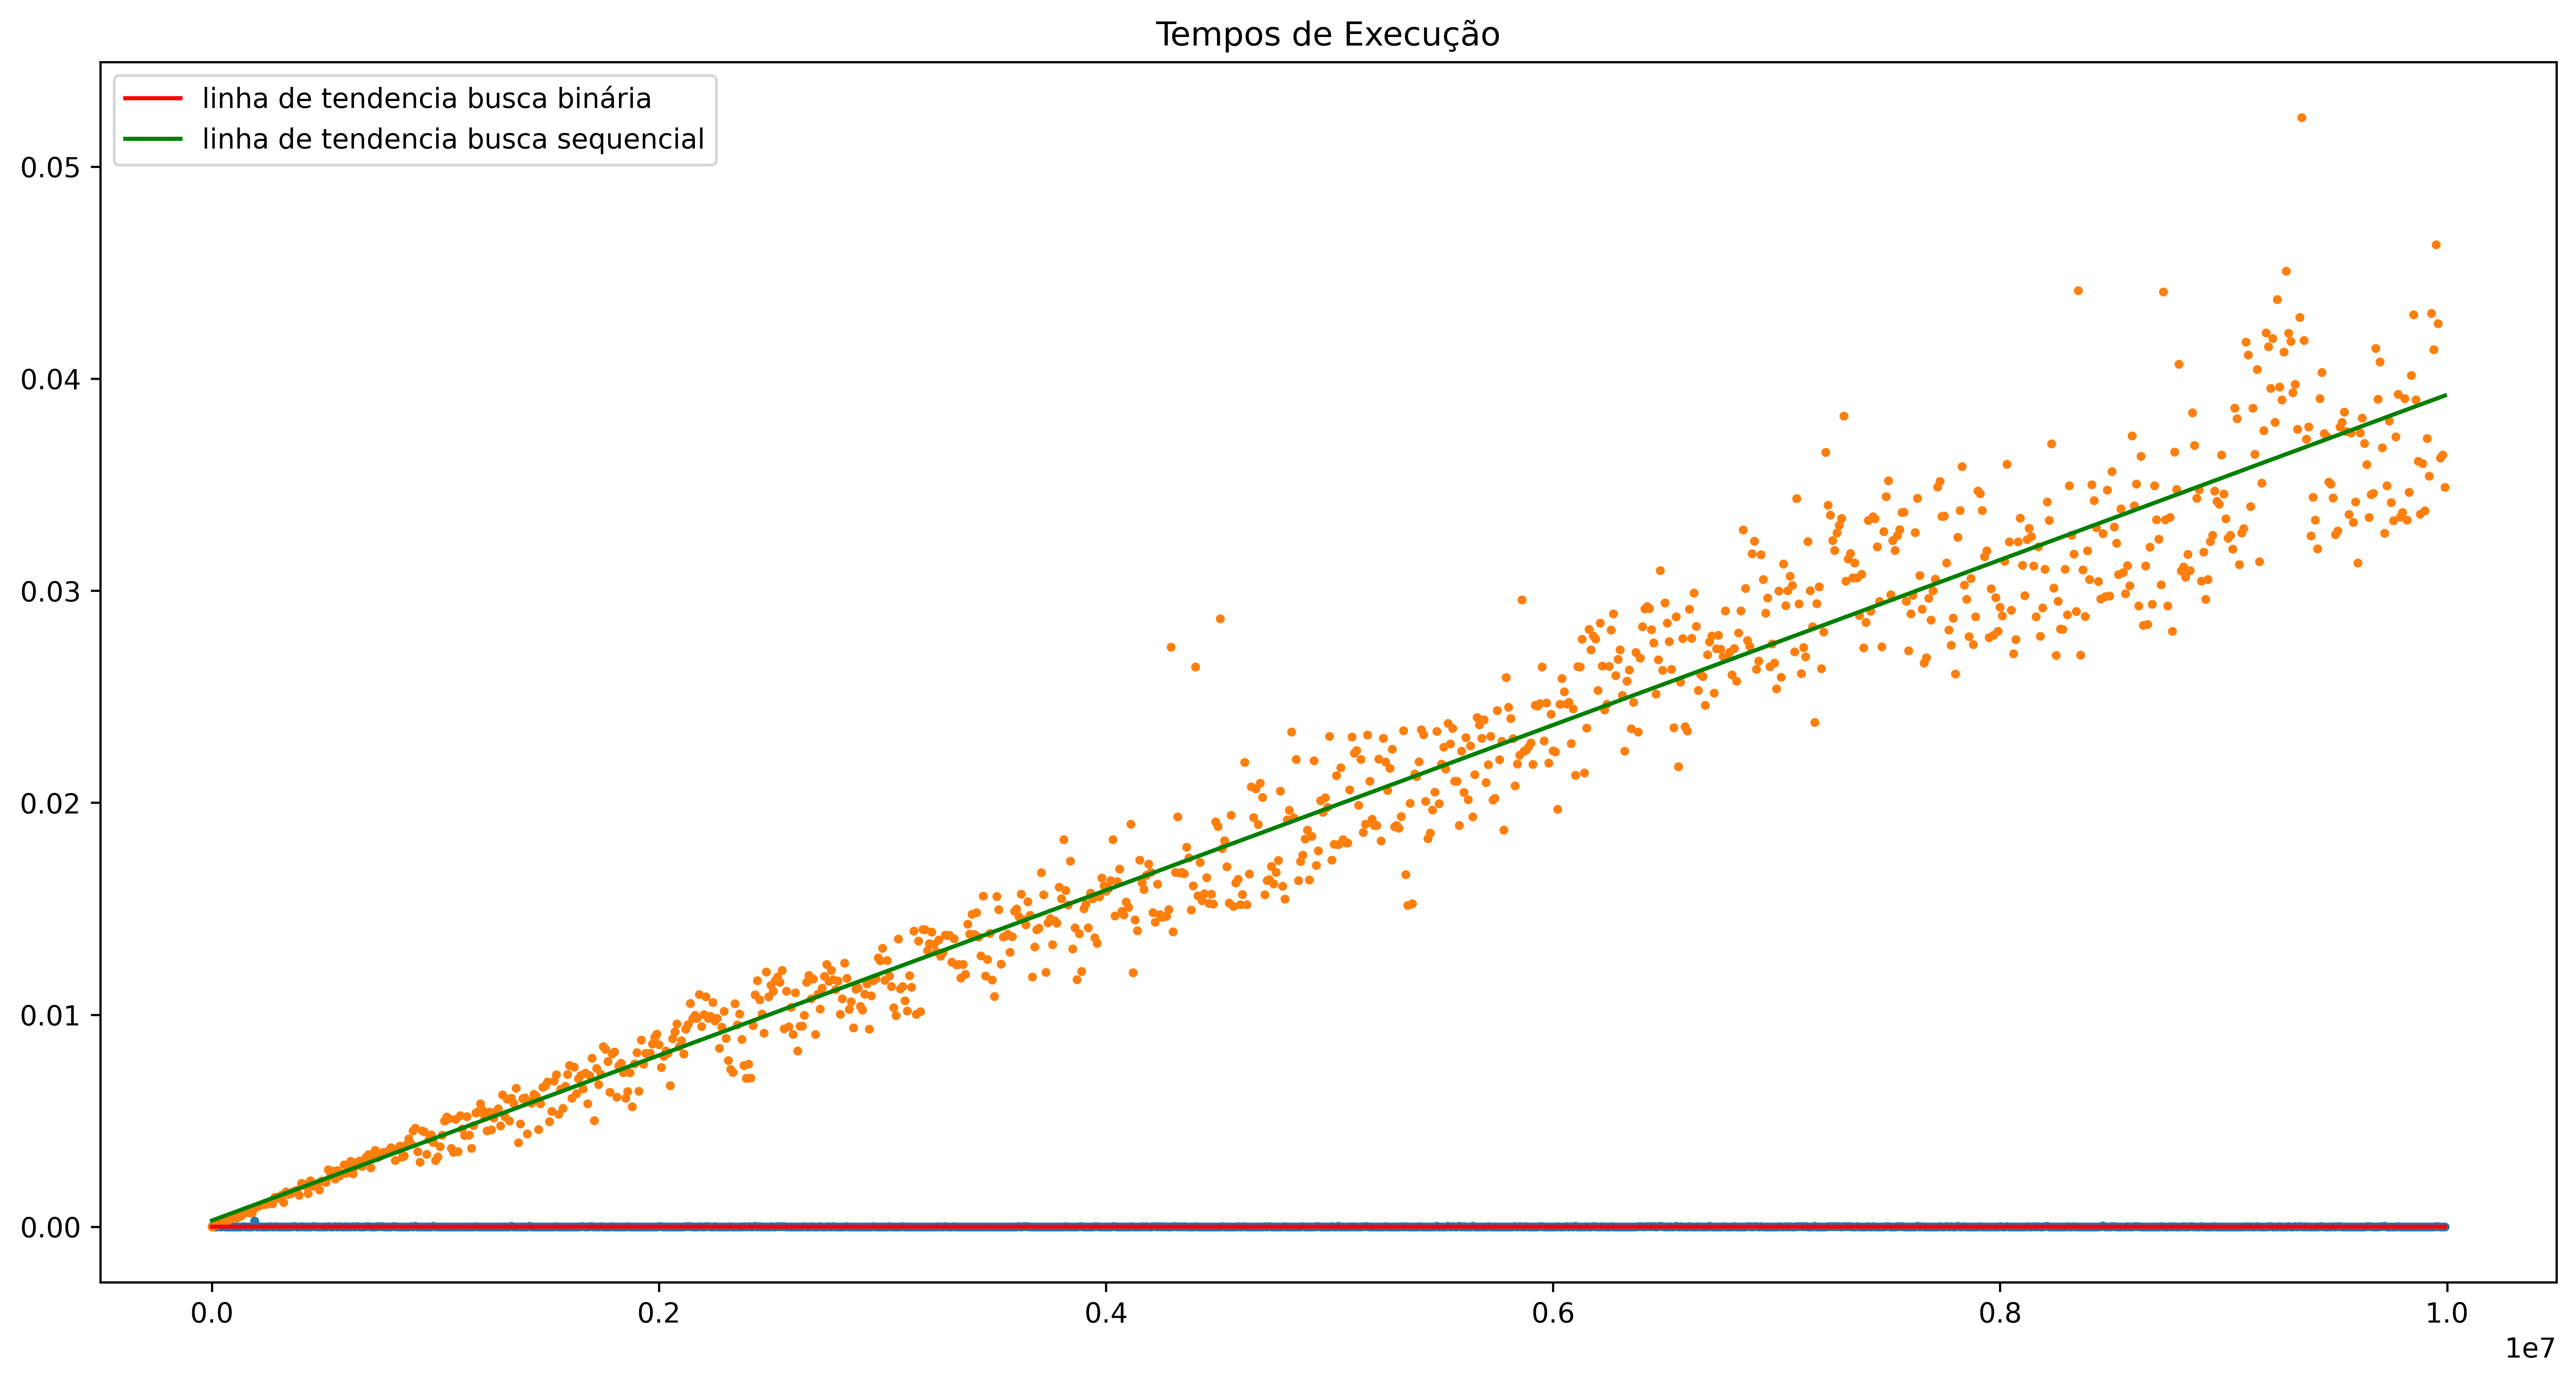

CompletedProcess(args='rm entrada', returncode=0)

In [2]:
plt.figure(figsize=(16, 8), dpi=600) 
plt.scatter(entradas,tempos_busca_bin,s=5)
plt.scatter(entradas,tempos_busca_seq,s=5)
plt.title("Tempos de Execução")

coeficientes_busca_bin = np.polyfit(entradas, tempos_busca_bin,1)
trendline_x1 = np.linspace(min(entradas),max(entradas),100)
trendline_y1 = np.polyval(coeficientes_busca_bin,trendline_x1)
plt.plot(trendline_x1,trendline_y1,color="red",label="linha de tendencia busca binária")

coeficientes_busca_seq = np.polyfit(entradas, tempos_busca_seq,1)
trendline_x2 = np.linspace(min(entradas),max(entradas),100)
trendline_y2 = np.polyval(coeficientes_busca_seq,trendline_x2)
plt.plot(trendline_x2,trendline_y2,color="green",label="linha de tendencia busca sequencial")

plt.legend()
plt.show()

subprocess.run("rm busca_sequencial",shell=True)
subprocess.run("rm busca_binaria",shell=True)
subprocess.run("rm entrada",shell=True)
